# Task 1

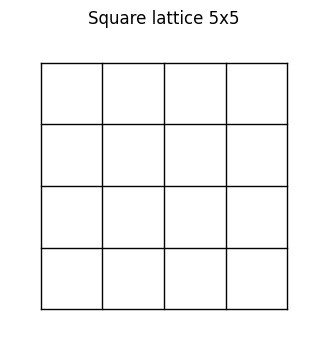

In [6]:
import matplotlib.pyplot as plt

def draw_square_lattice(grid_size: int, spacing: float = 1.0):
    """
    Draws lattice of points connected by lines in a square grid pattern.
    """
    if not isinstance(grid_size, int) or grid_size < 2:
        print("Error: grid_size must be an integer greater than or equal to 2.")
        return

    fig, ax = plt.subplots(figsize=(4, 4))

    # Calculate the maximum coordinate 
    max_coord = (grid_size - 1) * spacing

    # Vertical lines
    for i in range(grid_size):
        x_position = i * spacing
        ax.plot([x_position, x_position], [0, max_coord], color='black', linewidth=1)

    # Horizontal lines
    for i in range(grid_size):
        y_position = i * spacing
        ax.plot([0, max_coord], [y_position, y_position], color='black', linewidth=1)

    ax.set_aspect('equal', adjustable='box')  
    plt.title(f'Square lattice {grid_size}x{grid_size}')

    # Set axis limits with a small margin
    margin = spacing * 0.5
    ax.set_xlim(-margin, max_coord + margin)
    ax.set_ylim(-margin, max_coord + margin)
    ax.axis('off')
    plt.show()

if __name__ == '__main__':
    draw_square_lattice(grid_size=5)

# Task 2

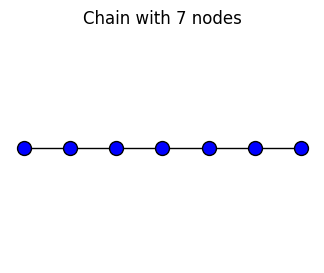

In [16]:
def draw_chain(num_nodes: int, spacing: float = 1.0):
    """
    Draws chain
    """
    if not isinstance(num_nodes, int) or num_nodes < 2:
        print("Error: num_nodes must be an integer greater than or equal to 2.")
        return

    fig, ax = plt.subplots(figsize=(10, 3))

    # Generate node coordinates
    x_coords = [i * spacing for i in range(num_nodes)]
    y_coords = [0] * num_nodes  # All nodes on the same horizontal line

    # Draw connections (edges)
    ax.plot(x_coords, y_coords, color='black', linewidth=1, zorder=1)

    # Draw nodes
    ax.scatter(x_coords, y_coords, color='blue', s=100, zorder=2, edgecolor='black')
    plt.title(f'Chain with {num_nodes} nodes')
    ax.set_aspect('equal', adjustable='box')

    # Limits setup
    margin = spacing * 0.5
    ax.set_ylim(-margin * 5, margin * 5)  # Larger margin for Y axis
    ax.axis('off')
    plt.show()

if __name__ == '__main__':
    draw_chain(num_nodes=7)


# Task 3

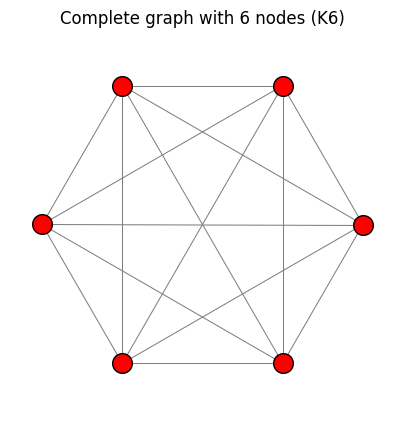

In [20]:
import numpy as np

def draw_complete_graph(num_nodes: int):
    """
    Draws a complete graph where each node is connected to every other node.
    """
    if not isinstance(num_nodes, int) or num_nodes < 2:
        print("Error: num_nodes must be an integer greater than or equal to 2.")
        return
    
    fig, ax = plt.subplots(figsize=(5, 5))

    # Calculate node positions in a circle
    radius = 1.0
    angles = np.linspace(0, 2 * np.pi, num_nodes, endpoint=False)
    x_coords = radius * np.cos(angles)
    y_coords = radius * np.sin(angles)
    
    node_positions = list(zip(x_coords, y_coords))

    # Draw edges between all pairs of nodes
    for i in range(num_nodes):
        for j in range(i + 1, num_nodes):
            node1 = node_positions[i]
            node2 = node_positions[j]
            ax.plot([node1[0], node2[0]], [node1[1], node2[1]], color='gray', linewidth=0.75, zorder=1)

    # Draw nodes
    ax.scatter(x_coords, y_coords, color='red', s=200, zorder=2, edgecolor='black')

    # Aesthetic settings for the plot
    plt.title(f'Complete graph with {num_nodes} nodes (K{num_nodes})')
    ax.set_aspect('equal', adjustable='box')
    margin = 0.2
    ax.set_xlim(-radius - margin, radius + margin)
    ax.set_ylim(-radius - margin, radius + margin)
    ax.axis('off')
    plt.show()


if __name__ == '__main__':
    draw_complete_graph(num_nodes=6)


# Task 4

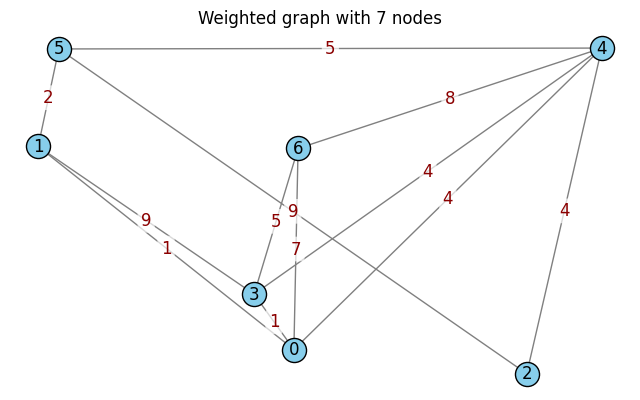

In [26]:
import random

def draw_weighted_graph(num_nodes: int):
    """
    Draws a sample weighted graph.
    """
    if not isinstance(num_nodes, int) or num_nodes <= 5:
        print("Error: num_nodes must be an integer greater than 5.")
        return

    fig, ax = plt.subplots(figsize=(8, 8))

    # Generate random node positions
    node_positions = np.random.rand(num_nodes, 2) * 10
    x_coords = node_positions[:, 0]
    y_coords = node_positions[:, 1]

    # Generates random edges with weights
    edges = []
    for i in range(num_nodes):
        for j in range(i + 1, num_nodes):
            # Add an edge with 50% probability
            if random.random() > 0.5:
                weight = random.randint(1, 10)
                edges.append((i, j, weight))

    # Draw edges with weights
    for start_node, end_node, weight in edges:
        x1, y1 = node_positions[start_node]
        x2, y2 = node_positions[end_node]

        # Draw line
        ax.plot([x1, x2], [y1, y2], color='gray', linewidth=1, zorder=1)
        
        # Calculating position for weight text
        text_x = (x1 + x2) / 2
        text_y = (y1 + y2) / 2
        ax.text(text_x, text_y, str(weight), color='darkred', fontsize=12, ha='center', va='center',
                bbox=dict(facecolor='white', alpha=0.7, edgecolor='none', boxstyle='round,pad=0.2'))

    # Draw nodes
    ax.scatter(x_coords, y_coords, color='skyblue', s=300, zorder=2, edgecolor='black')
    for i, pos in enumerate(node_positions):
        ax.text(pos[0], pos[1], str(i), color='black', fontsize=12, ha='center', va='center')
    plt.title(f'Weighted graph with {num_nodes} nodes')
    ax.set_aspect('equal', adjustable='box')
    ax.axis('off')
    plt.show()

if __name__ == '__main__':
    draw_weighted_graph(num_nodes=7)



# Task 5

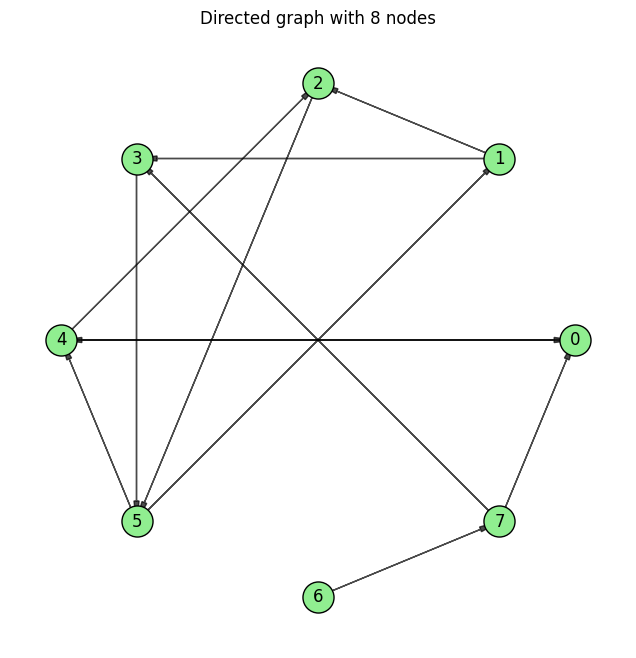

In [34]:
def draw_directed_graph(num_nodes: int):
    """
    Draws a sample directed graph.
    """
    if not isinstance(num_nodes, int) or num_nodes <= 5:
        print("Error: num_nodes must be an integer greater than 5.")
        return
        
    fig, ax = plt.subplots(figsize=(8, 8))

    # Positioning nodes in a circle
    radius = 5.0
    angles = np.linspace(0, 2 * np.pi, num_nodes, endpoint=False)
    x_coords = radius * np.cos(angles)
    y_coords = radius * np.sin(angles)
    node_positions = list(zip(x_coords, y_coords))

    # Generating random directed edges
    edges = []
    for i in range(num_nodes):
        # Randomly select how many other nodes the current node will connect to
        num_connections = random.randint(1, 2)
        for _ in range(num_connections):
            j = random.randint(0, num_nodes - 1)
            if i != j and (i, j) not in edges:
                edges.append((i, j))

    # Drawing edges as arrows
    for start_idx, end_idx in edges:
        x1, y1 = node_positions[start_idx]
        x2, y2 = node_positions[end_idx]
        ax.arrow(x1, y1, x2 - x1, y2 - y1,
                 head_width=0.1, head_length=0.4, fc='black', ec='black',
                 length_includes_head=True, zorder=1, alpha=0.7)

    # Drawing nodes
    ax.scatter(x_coords, y_coords, color='lightgreen', s=500, zorder=2, edgecolor='black')
    for i, (x, y) in enumerate(node_positions):
        ax.text(x, y, str(i), color='black', fontsize=12, ha='center', va='center')

    # Aesthetic settings
    plt.title(f'Directed graph with {num_nodes} nodes')
    ax.set_aspect('equal', adjustable='box')
    margin = 1.0
    ax.set_xlim(-radius - margin, radius + margin)
    ax.set_ylim(-radius - margin, radius + margin)
    ax.axis('off')
    plt.show()

if __name__ == '__main__':
    draw_directed_graph(num_nodes=8)

